<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 텐서플로, 파이토치


## 프레임워크, 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras


In [3]:
# 데이터셋 불러오기 -> MNIST

fashion_mnist = keras.datasets.fashion_mnist

(trd, trt), (tsd, tst) = fashion_mnist.load_data() # 학습용과 테스트용으로 분리되어서 제공

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# 데이터 셋 모양 확인

print(trd.shape, trt.shape)
print(tsd.shape, tst.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# 타입 확인
print(trd.dtype)
print(trt.dtype)
print(tsd.dtype)
print(tst.dtype)



uint8
uint8
uint8
uint8


In [6]:
import numpy as np

# 값 확인
np.unique(trd)



array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

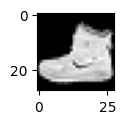

In [7]:
# 이미지 출력
import matplotlib.pyplot as plt



plt.figure(figsize=(1, 1))
plt.imshow(trd[0], cmap='gray')
plt.show()

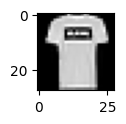

In [8]:

plt.figure(figsize=(1, 1))
plt.imshow(trd[1], cmap='gray')
plt.show()

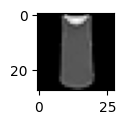

In [9]:
def my_imshow(img) :
  plt.figure(figsize=(1, 1))
  plt.imshow(img, cmap='gray')
  plt.show()

my_imshow(trd[2])

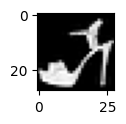

In [10]:
# 레이블 이름 저장.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[trt[9]]

my_imshow(trd[9])

In [38]:
## 모델 레이어 세팅 -> 다중분류

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 128)               38528     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 275318 (1.05 MB)
Trainable params: 275318 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
## 파라미터값 확인해보기
model.layers[3].get_weights()

[array([[-0.06134368,  0.20668732,  0.07313208, ...,  0.16305713,
         -0.19141477,  0.13219462],
        [ 0.06421699,  0.13205685, -0.02061468, ...,  0.0713511 ,
          0.15792175,  0.02047379],
        [ 0.07448773, -0.11257232,  0.05906753, ...,  0.11515017,
          0.15394048, -0.09890851],
        ...,
        [-0.03364271,  0.15340357,  0.17412241, ..., -0.12111045,
         -0.00764094, -0.00417998],
        [-0.03318718,  0.20702346,  0.03779186, ...,  0.18221213,
         -0.12982526, -0.16189831],
        [-0.0274801 , -0.00730792,  0.08546747, ..., -0.06818528,
          0.18933226,  0.03022559]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [42]:
## 모델 세부 세팅

model.compile(
  loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer = "adam",
  metrics = ["accuracy"]
)



In [14]:
## 학습 시키기

model.fit(trd, trt, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3256 - accuracy: 0.7678
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5326 - accuracy: 0.8220
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4762 - accuracy: 0.8371
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4339 - accuracy: 0.8481
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3997 - accuracy: 0.8586


In [39]:
np.unique(trd)

## 스케일링 -> 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

reshaped_trd = trd.reshape(60000, 28 * 28)
scaled_reshaped_trd = ss.fit_transform(reshaped_trd)
scaled_trd = scaled_reshaped_trd.reshape(60000, 28, 28)


In [43]:
model.fit(scaled_trd, trt, epochs=5)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 6ms/step - loss: 0.4380 - accuracy: 0.8406
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3297 - accuracy: 0.8774
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2937 - accuracy: 0.8908
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2697 - accuracy: 0.8995
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2503 - accuracy: 0.9063


In [44]:
# 예측하기
model.predict(tsd[0].reshape(1, 28, 28))


1/1 [==============================] - 0s 61ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)